# Importing neccassary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("whitegrid")
%matplotlib inline 

# Loading the data

In [2]:
df = pd.read_csv("diamonds.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Checking for missing values 
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Data Visualization

<AxesSubplot:>

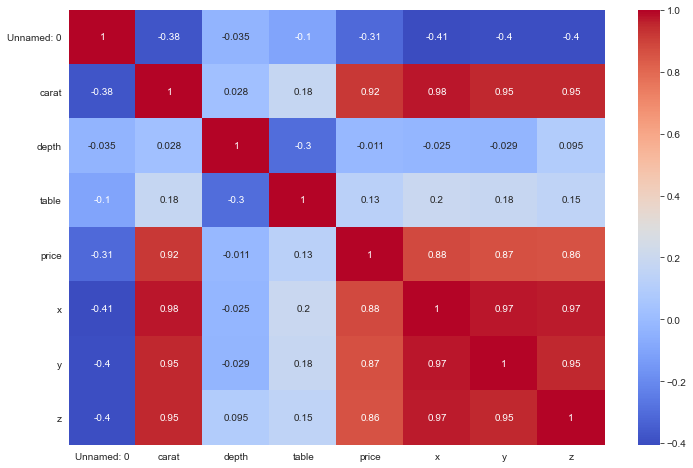

In [7]:
# Plotting correlations between variables 
plt.figure(figsize=(12,8))
diamond_df = df.corr()
sns.heatmap(diamond_df, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='cut', ylabel='count'>

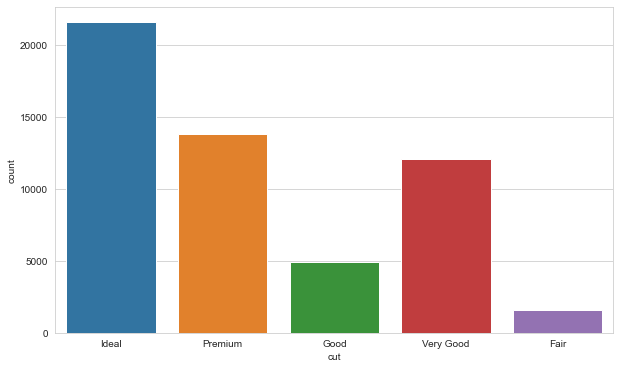

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='cut', data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

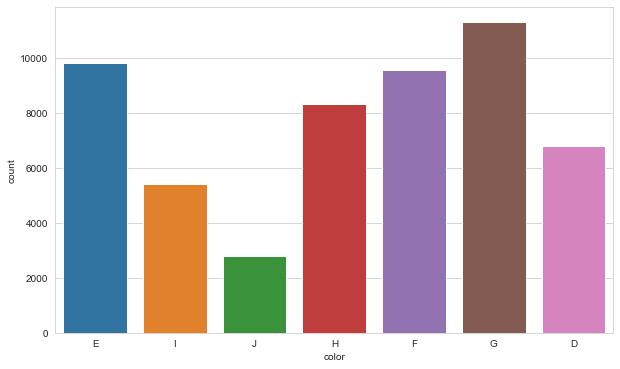

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='color', data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

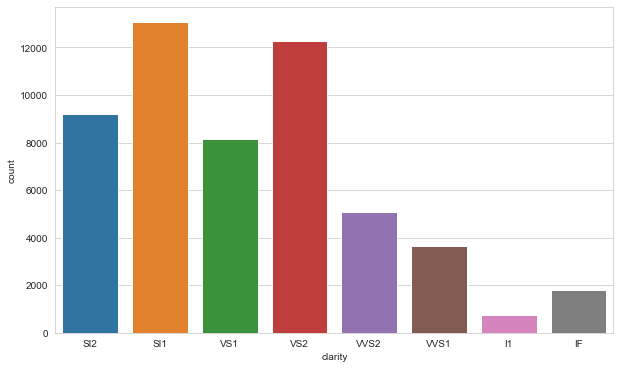

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='clarity', data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

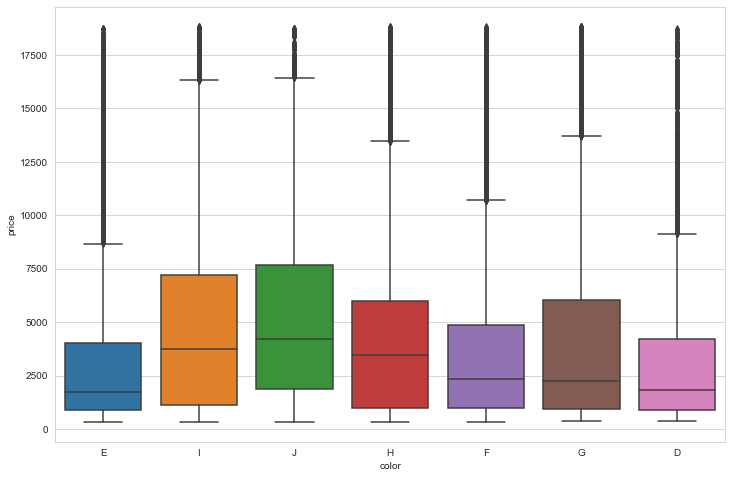

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='color', y='price', data=df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

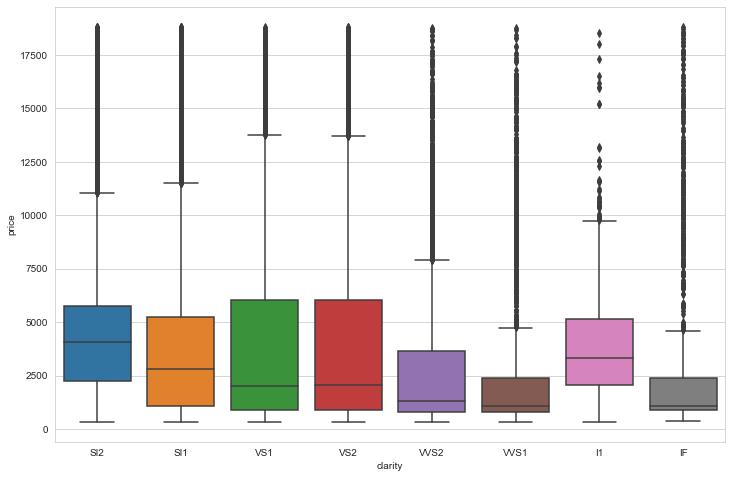

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x='clarity', y='price', data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

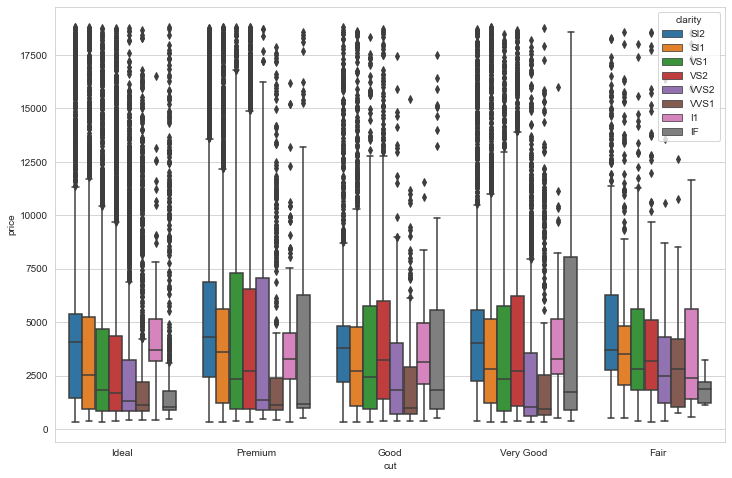

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='cut', y='price',hue='clarity', data=df)

# Data Prep for Model Fitting

In [14]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
# Dropping Unnammed columns
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
# Rearranging columns order 
df = df[['carat', 'cut', 'clarity', 'color', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [18]:
df

,carat,cut,clarity,color,depth,table,x,y,z,price
0,0.23,Ideal,SI2,E,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,SI1,E,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,VS1,E,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,VS2,I,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,SI2,J,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,SI1,D,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,SI1,D,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,SI1,D,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,SI2,H,61.0,58.0,6.15,6.12,3.74,2757


In [19]:
# Creating dummie varibles for data 
df = pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Rearranging columns order 
df = df[['carat', 'depth', 'table', 'x', 'y', 'z','cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2','color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'price']]

In [22]:
df.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,1,0,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,1,0,0,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,1,0,0,0,0,0,0,1,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,0,0,0,0,0,0,1,335


In [23]:
# Inspecting least expensive diamond price
df['price'].min()

326

In [24]:
# # Inspecting most expensive diamond price 
df['price'].max()

18823

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   cut_Good       53940 non-null  uint8  
 7   cut_Ideal      53940 non-null  uint8  
 8   cut_Premium    53940 non-null  uint8  
 9   cut_Very Good  53940 non-null  uint8  
 10  clarity_IF     53940 non-null  uint8  
 11  clarity_SI1    53940 non-null  uint8  
 12  clarity_SI2    53940 non-null  uint8  
 13  clarity_VS1    53940 non-null  uint8  
 14  clarity_VS2    53940 non-null  uint8  
 15  clarity_VVS1   53940 non-null  uint8  
 16  clarity_VVS2   53940 non-null  uint8  
 17  color_E        53940 non-null  uint8  
 18  color_

# Importing Models

In [26]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split

In [27]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [28]:
df_dmatrix = xgb.DMatrix(data=X,label=y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [30]:
xgb_reg = xgb.XGBRFRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [31]:
xgb_reg.fit(X_train, y_train)

[22:06:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=0.3, enable_categorical=False, gamma=0,
               gpu_id=-1, importance_type=None, interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=10, n_jobs=16, num_parallel_tree=10,
               objective='reg:linear', predictor='auto', random_state=0,
               reg_alpha=10, scale_pos_weight=1, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [32]:
preds = xgb_reg.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5161.068942


In [34]:
# Hypertuning model
params = {'objective': 'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'alpha':10 }

In [35]:
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

[22:06:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:06:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5074.833821,14.850701,5074.990723,29.777766
1,4678.733398,113.243179,4678.053711,99.660056
2,4250.128906,102.955016,4250.788411,90.405970
3,3925.219401,94.862062,3925.599691,61.005091
4,3572.349935,85.608016,3574.248942,55.542128


In [37]:
print((cv_results['test-rmse-mean']).tail(1))

49    907.324443
Name: test-rmse-mean, dtype: float64


In [38]:
xg_reg = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10)

[22:07:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


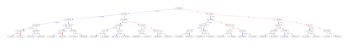

In [39]:
xgb.plot_tree(xg_reg,num_tress=0)
plt.rcParams['figure.figsize'] = [80,40]
plt.show()

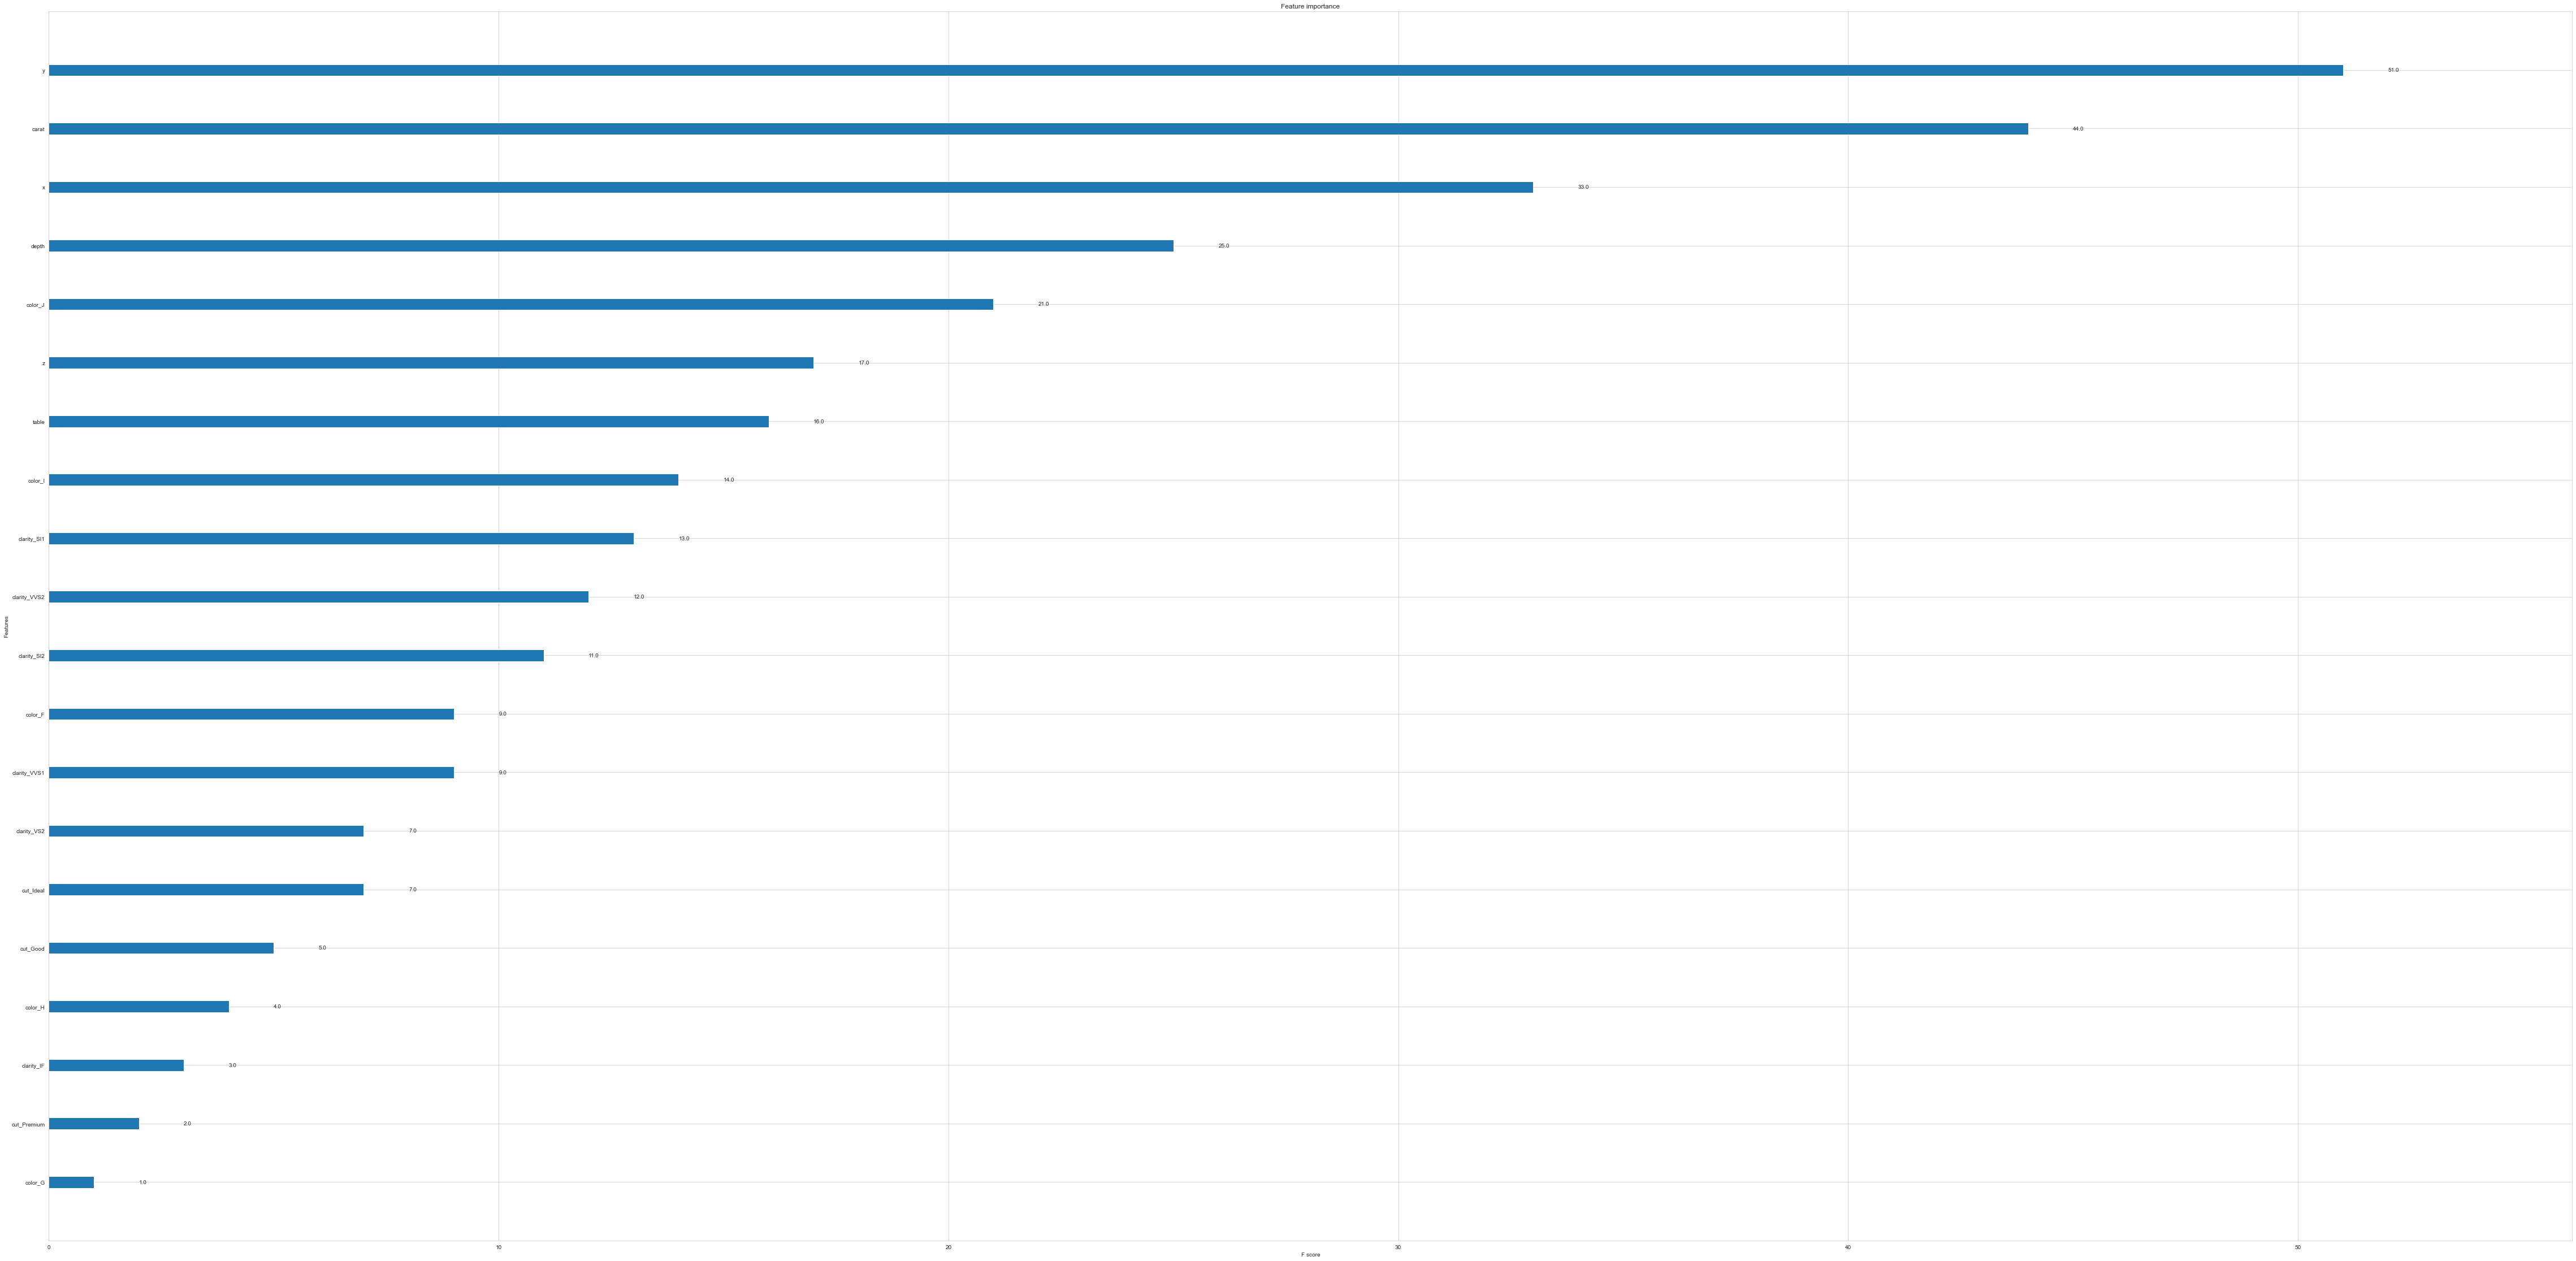

In [40]:
# Plotting importance of features
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

# MinMax Scaled 

In [41]:
scaler = StandardScaler()

In [42]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [43]:
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [45]:
DM_train = xgb.DMatrix(data=X_train, label =y_train)
DM_test = xgb.DMatrix(data=X_test, label= y_test)

In [46]:
param = {'objective':'reg:linear', 'colsample_bytree' : 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

In [47]:
n_estimators = 300

In [48]:
xg_reg = xgb.train(params= param, dtrain= DM_train, num_boost_round= n_estimators )

[22:07:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
cv_results = xgb.cv(dtrain=DM_train, params= param, nfold=5, num_boost_round=n_estimators, early_stopping_rounds=10, metrics='rmse', as_pandas=True)

[22:07:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
cv_results.describe()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
count,300.000000,300.000000,300.000000,300.000000
mean,0.224955,0.005416,0.233407,0.007013
std,0.115347,0.008124,0.113001,0.006583
min,0.172545,0.001175,0.184221,0.004438
25%,0.179216,0.001939,0.190111,0.004606
50%,0.189520,0.002518,0.198901,0.004684
75%,0.212390,0.003946,0.219499,0.005176
max,1.017078,0.045565,1.017146,0.040985


In [51]:
y_pred = xg_reg.predict(DM_train)
print("R2 score: ", r2_score(y_train, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_train, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))

R2 score:  0.9707977734803463
Mean Absolute Error:  0.08510728273873215
Mean Squared Error:  0.02921793771158362


In [52]:
y_pred = xg_reg.predict(DM_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 score:  0.968971663241705
Mean Absolute Error:  0.08649298830853977
Mean Squared Error:  0.030961088497127403
